In [2]:
import matplotlib as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
data_dir = 'New_Train'
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (28, 28),
    batch_size = 24
)


Found 708 files belonging to 3 classes.
Using 567 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (28, 28),
    batch_size = 24   
)



Found 708 files belonging to 3 classes.
Using 141 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Blank', 'Cross', 'Zeroes']


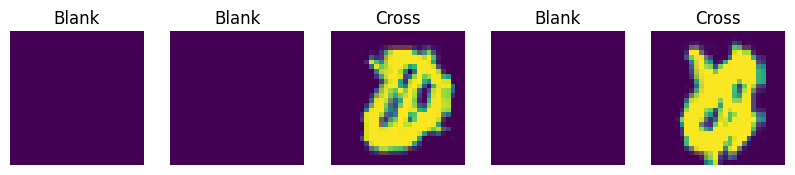

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(5, 28, 28, 3)
(5,)


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(28, 28, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [8]:
img_height = 28
img_width = 28
num_classes = len(class_names)
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [9]:

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes, name="outputs")
])

In [10]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 3)         0         
                                                                 
 rescaling_2 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                 

In [11]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
24/24 [==============================] - 4s 63ms/step - loss: 0.8029 - accuracy: 0.5591 - val_loss: 0.5449 - val_accuracy: 0.6950
Epoch 2/10
24/24 [==============================] - 1s 41ms/step - loss: 0.5479 - accuracy: 0.6649 - val_loss: 0.6009 - val_accuracy: 0.6950
Epoch 3/10
24/24 [==============================] - 1s 41ms/step - loss: 0.4997 - accuracy: 0.7143 - val_loss: 0.4100 - val_accuracy: 0.7305
Epoch 4/10
24/24 [==============================] - 1s 42ms/step - loss: 0.4463 - accuracy: 0.7831 - val_loss: 0.4009 - val_accuracy: 0.7518
Epoch 5/10
24/24 [==============================] - 1s 41ms/step - loss: 0.3850 - accuracy: 0.8095 - val_loss: 0.2857 - val_accuracy: 0.8723
Epoch 6/10
24/24 [==============================] - 1s 39ms/step - loss: 0.3137 - accuracy: 0.8536 - val_loss: 0.1760 - val_accuracy: 0.9362
Epoch 7/10
24/24 [==============================] - 1s 40ms/step - loss: 0.2467 - accuracy: 0.9012 - val_loss: 0.6795 - val_accuracy: 0.7518
Epoch 8/10
24

In [98]:
model.save("jupyter-model-6.keras")